In [61]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

import h5py


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
data1 = ConfResults(fn="../data/zminus2_N048_m-0501265_h003684_c06000.h5",thTime=400,decim=1)

In [52]:
plt.plot(autocorrelationFunction(data1.phi[:4000,5]))

NameError: name 'autocorrelationFunction' is not defined

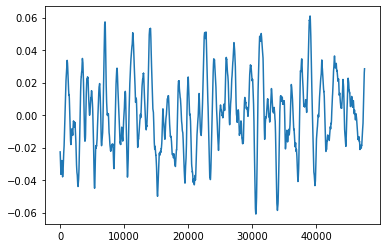

In [16]:
data1.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,5])
plt.show()

In [79]:
data1.computeWallXFourier("A1")
data1.computeWallXFourier("A2")
data1.computeWallXFourier("A3")

In [63]:
test= tmpcomputeCttp(data1.wallXF["A2"][:,0],data1.wallXF["A2"][:,0],lambda x : jackknife(x,1) ,tMax=1450,decim=50,conn=False)

(2.939568448291276e-07+0j)


/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


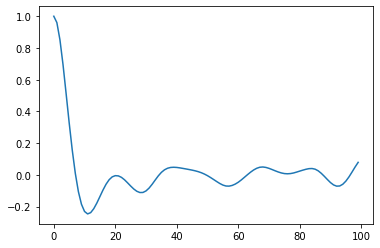

In [69]:
plt.plot(autocorrelationFunction(test)[:100])

In [80]:
av= (data1.wallXF["A1"][:,1] + data1.wallXF["A2"][:,1] + data1.wallXF["A3"][:,1]) / 3.0

testA, testAErr = computeCttp(av,av,lambda x : jackknife(x,1000) ,tMax=4500,decim=1,conn=False)

<ErrorbarContainer object of 3 artists>

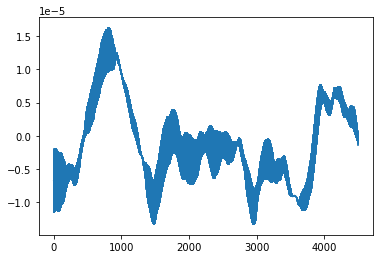

In [81]:
plt.errorbar(np.arange(len(testA)),np.real(testA),np.real(testAErr))

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


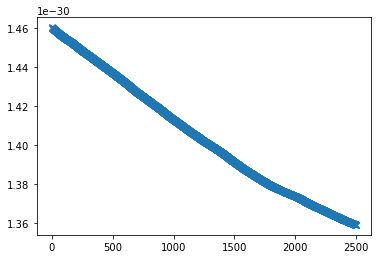

In [190]:
plt.plot(testV[:2500],'x')

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


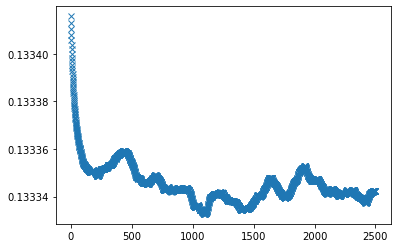

In [200]:
plt.plot(testPhi[:2500],'x')

In [43]:
def rhoOm(ω, dt, arr):
    res = 0
    
    for i in range(len(arr)):
        M = 1.0 / 2000.0
        t = i * dt
        res += arr[i] * np.exp(1j * ω * t - M * t)  
    return res
    

In [44]:
oms = np.arange(-0.03,0.03,1.0/(3500.0*dt))
resA=[]
resV=[]
resPhi=[]
for om in oms:
    resA.append(rhoOm(om,0.8,testA[:3500]))    
    #resV.append(rhoOm(om,0.8,testV[:4000]))    
    #resPhi.append(rhoOm(om,0.8,testPhi[:4000]))

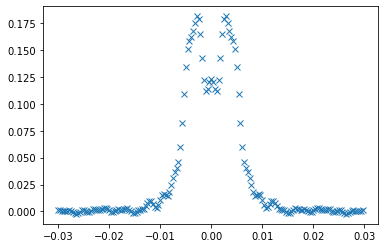

In [46]:
plt.plot(oms,np.real(resA),'x')
#plt.savefig('jA1.pdf')
#plt.yscale('log')

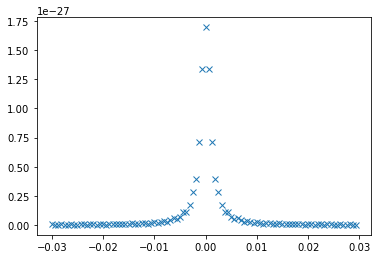

In [193]:
plt.plot(oms,np.real(resV),'x')

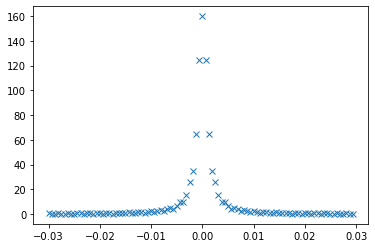

In [205]:
plt.plot(oms,np.real(resPhi),'x')
plt.savefig('phi0.pdf')